In [1]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

In [2]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
 # Missing data

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [5]:
# Replacments

df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates


In [6]:
#finding nested columns
nestedcolumns=[]
for i in df.columns:
    column_name = i
    if (df[column_name].apply(lambda x: "," in str(x))).any():
        nestedcolumns.append(i)
nestedcolumns


['title',
 'director',
 'cast',
 'country',
 'date_added',
 'listed_in',
 'description']

In [7]:
#dropping unnecessary columns
nestedcolumns.remove('title')
nestedcolumns.remove('date_added')
nestedcolumns.remove('description')
nestedcolumns.remove('listed_in')
nestedcolumns

['director', 'cast', 'country']

In [8]:
#converting nested column values into lists
for i in nestedcolumns:
    df[i] = df[i].apply(lambda x: str(x).split(','))
df =df.reset_index()

In [9]:
small_df = df
small_df = small_df.explode('cast')
small_df = small_df.explode('country')
small_df = small_df.explode('director')

In [10]:
small_df

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,No Data,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,1,s2,TV Show,Blood & Water,No Data,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,1,s2,TV Show,Blood & Water,No Data,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,1,s2,TV Show,Blood & Water,No Data,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8789,8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8789,8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8789,8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [11]:
small_df.drop_duplicates(inplace = True)

small_df.shape

(89301, 13)

In [12]:
small_df.isnull().sum()

index           0
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [13]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89301 entries, 0 to 8789
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         89301 non-null  int64 
 1   show_id       89301 non-null  object
 2   type          89301 non-null  object
 3   title         89301 non-null  object
 4   director      89301 non-null  object
 5   cast          89301 non-null  object
 6   country       89301 non-null  object
 7   date_added    89301 non-null  object
 8   release_year  89301 non-null  int64 
 9   rating        89301 non-null  object
 10  duration      89301 non-null  object
 11  listed_in     89301 non-null  object
 12  description   89301 non-null  object
dtypes: int64(2), object(11)
memory usage: 9.5+ MB


In [14]:
small_df["date_added"] = pd.to_datetime(df['date_added'])

small_df['month_added']=small_df['date_added'].dt.month
small_df['month_name_added']=small_df['date_added'].dt.month_name()
small_df['year_added'] = small_df['date_added'].dt.year



In [15]:
small_df.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,1,s2,TV Show,Blood & Water,No Data,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
1,1,s2,TV Show,Blood & Water,No Data,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
1,1,s2,TV Show,Blood & Water,No Data,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
1,1,s2,TV Show,Blood & Water,No Data,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021


In [16]:
#Find the counts of each categorical variable both using graphical and non-graphical analysis.
small_df.director.value_counts()


No Data             21837
Martin Scorsese       217
Steven Spielberg      205
Martin Campbell       154
Raja Gosnell          154
                    ...  
 Ousmane Ly             1
Adrien Lagier           1
Charles Officer         1
Jacob Schwab            1
Kirsten Johnson         1
Name: director, Length: 5119, dtype: int64

In [17]:
small_df.cast.value_counts()

No Data                   1192
 Alfred Molina              85
 Salma Hayek                66
 Frank Langella             66
Liam Neeson                 61
                          ... 
 Phenphet Phenkul            1
 Johnny Hao                  1
Todsapol Maisuk              1
 Oh Gwang-rok                1
 Chittaranjan Tripathy       1
Name: cast, Length: 39249, dtype: int64

In [18]:
small_df.country.value_counts()

United States     31470
India              8230
 United States     4380
United Kingdom     4166
Japan              3016
                  ...  
 Vatican City         1
 Sri Lanka            1
 Samoa                1
Slovenia              1
 Kazakhstan           1
Name: country, Length: 197, dtype: int64

In [19]:
small_df.rating.value_counts()

TV-MA       29866
TV-14       17415
R           12864
PG-13        7814
TV-PG        6349
PG           5182
TV-Y7        4068
TV-Y         2744
TV-G         1329
G             878
NR            666
NC-17          55
TV-Y7-FV       39
UR             32
Name: rating, dtype: int64

In [20]:
small_df.listed_in.value_counts()

Dramas, International Movies                              4274
Children & Family Movies, Comedies                        3578
Dramas, Independent Movies, International Movies          3465
Children & Family Movies                                  2912
Comedies, Dramas, International Movies                    2841
                                                          ... 
Reality TV, Science & Nature TV, TV Action & Adventure       1
Docuseries, Reality TV, Teen TV Shows                        1
British TV Shows, Docuseries, Reality TV                     1
Crime TV Shows, International TV Shows, Reality TV           1
Docuseries, Science & Nature TV, TV Comedies                 1
Name: listed_in, Length: 513, dtype: int64

In [21]:
top3_gen = small_df['rating'].value_counts().head(10).index
top3_pub = small_df['cast'].value_counts().index[1:11]
top3_plt = small_df['director'].value_counts().index[1:11]
top3_data = small_df[(small_df['rating'].isin(top3_gen)) &
                     (small_df['cast'].isin(top3_pub))&
                     (small_df['director'].isin(top3_plt))]
top3_data

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
1624,1624,s1625,Movie,The Da Vinci Code,Ron Howard,Alfred Molina,United States,2020-12-01,2006,PG-13,149 min,Thrillers,"When the curator of the Louvre is killed, a Ha...",12,December,2020
1624,1624,s1625,Movie,The Da Vinci Code,Ron Howard,Alfred Molina,Malta,2020-12-01,2006,PG-13,149 min,Thrillers,"When the curator of the Louvre is killed, a Ha...",12,December,2020
1624,1624,s1625,Movie,The Da Vinci Code,Ron Howard,Alfred Molina,France,2020-12-01,2006,PG-13,149 min,Thrillers,"When the curator of the Louvre is killed, a Ha...",12,December,2020
1624,1624,s1625,Movie,The Da Vinci Code,Ron Howard,Alfred Molina,United Kingdom,2020-12-01,2006,PG-13,149 min,Thrillers,"When the curator of the Louvre is killed, a Ha...",12,December,2020
7061,7071,s7072,Movie,Indiana Jones and the Last Crusade,Steven Spielberg,John Rhys-Davies,United States,2019-01-01,1989,PG-13,127 min,"Action & Adventure, Children & Family Movies, ...","Accompanied by his father, Indiana Jones sets ...",1,January,2019
7062,7072,s7073,Movie,Indiana Jones and the Raiders of the Lost Ark,Steven Spielberg,John Rhys-Davies,United States,2019-01-01,1981,PG,116 min,"Action & Adventure, Children & Family Movies, ...",When Indiana Jones is hired by the government ...,1,January,2019
7062,7072,s7073,Movie,Indiana Jones and the Raiders of the Lost Ark,Steven Spielberg,Alfred Molina,United States,2019-01-01,1981,PG,116 min,"Action & Adventure, Children & Family Movies, ...",When Indiana Jones is hired by the government ...,1,January,2019
7941,7957,s7958,Movie,Schindler's List,Steven Spielberg,Liam Neeson,United States,2018-04-01,1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,4,April,2018


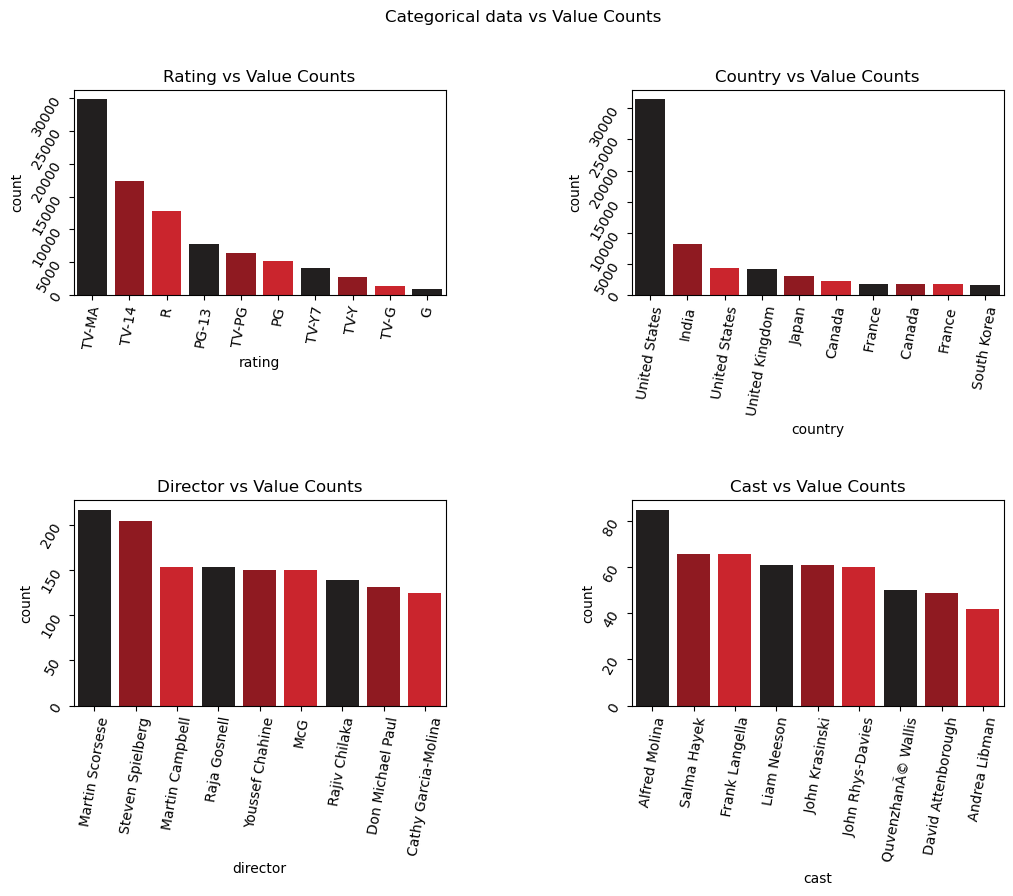

In [22]:
#For graphical analysis:
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Categorical data vs Value Counts')

plt.subplot(2, 2,1)
sns.countplot(x='rating', data = small_df, palette = ['#221f1f', '#a20710', '#e50914'], order= small_df.rating.value_counts().index[:10] )
plt.xticks(rotation = 80)
plt.yticks(rotation = 60)
plt.title('Rating vs Value Counts')

plt.subplot(2, 2,2)
sns.countplot(x='country', data = small_df, palette = ['#221f1f', '#a20710', '#e50914'], order= small_df.country.value_counts().index[:10] )
plt.xticks(rotation = 80)
plt.yticks(rotation = 60)
plt.title('Country vs Value Counts')

plt.subplot(2, 2,3)
sns.countplot(x='director', data = small_df, palette = ['#221f1f', '#a20710', '#e50914'], order= small_df.director.value_counts().index[1:10] )
plt.xticks(rotation = 80)
plt.yticks(rotation = 60)
plt.title('Director vs Value Counts')

plt.subplot(2, 2,4)
sns.countplot(x='cast', data = small_df, palette = ['#221f1f', '#a20710', '#e50914'], order= small_df.cast.value_counts().index[1:10] )
plt.xticks(rotation = 80)
plt.yticks(rotation = 60)

plt.title('Cast vs Value Counts')

plt.subplots_adjust(wspace=0.5, hspace = 1)
plt.show()

In [23]:
toptencountriesmovies = small_df[small_df['type']=='Movie'].groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().head(10)
toptencountriestvshows = small_df[small_df['type']=='TV Show'].groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().head(10)

Text(0.5, 1.0, 'Top 10 countries x TV Shows produced')

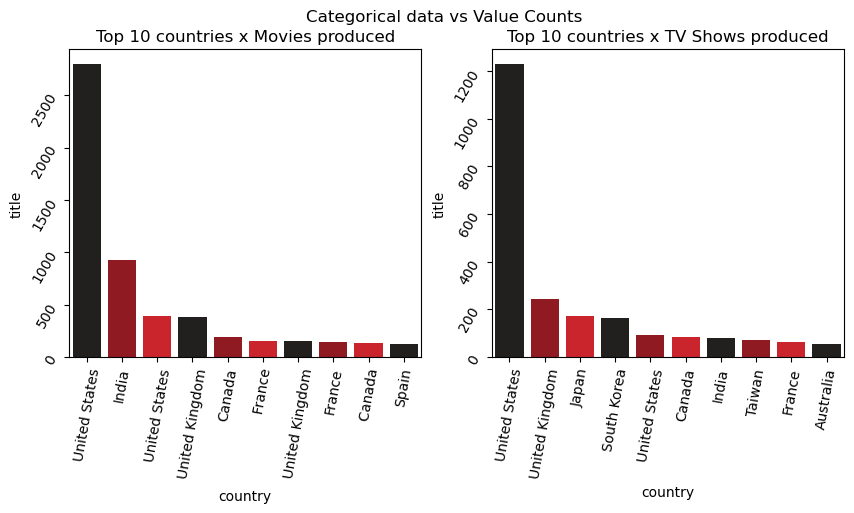

In [24]:

fig = plt.figure(figsize=(10, 4))
fig.suptitle('Categorical data vs Value Counts')

plt.subplot(1,2,1)
sns.barplot(x='country', y='title', data=toptencountriesmovies,  palette = ['#221f1f', '#a20710', '#e50914'])

plt.xticks(rotation = 80)
plt.yticks(rotation = 60)
plt.title('Top 10 countries x Movies produced')


plt.subplot(1,2,2)
sns.barplot(x='country', y='title', data=toptencountriestvshows,  palette = ['#221f1f', '#a20710', '#e50914'])

plt.xticks(rotation = 80)
plt.yticks(rotation = 60)
plt.title('Top 10 countries x TV Shows produced')

In [25]:
small_df['week_added'] = small_df['date_added'].dt.week
small_df.reset_index()
small_df

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,week_added
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,38
1,1,s2,TV Show,Blood & Water,No Data,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,38
1,1,s2,TV Show,Blood & Water,No Data,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,38
1,1,s2,TV Show,Blood & Water,No Data,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,38
1,1,s2,TV Show,Blood & Water,No Data,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019,9
8789,8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019,9
8789,8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019,9
8789,8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,3,March,2019,9


In [26]:
weeklymovies = small_df[small_df['type']=='Movie'].groupby('week_added')['title'].nunique().sort_values(ascending = False).reset_index().head(10)
weeklytvshows = small_df[small_df['type']=='TV Show'].groupby('week_added')['title'].nunique().sort_values(ascending = False).reset_index().head(10)
weeklymovies

,week_added,title
0,1,316
1,44,243
2,40,215
3,9,206
4,26,195
5,35,189
6,31,185
7,13,174
8,18,173
9,27,154


In [27]:
weeklytvshows

,week_added,title
0,27,86
1,31,83
2,13,76
3,44,75
4,24,75
5,35,74
6,26,73
7,5,72
8,40,72
9,50,70


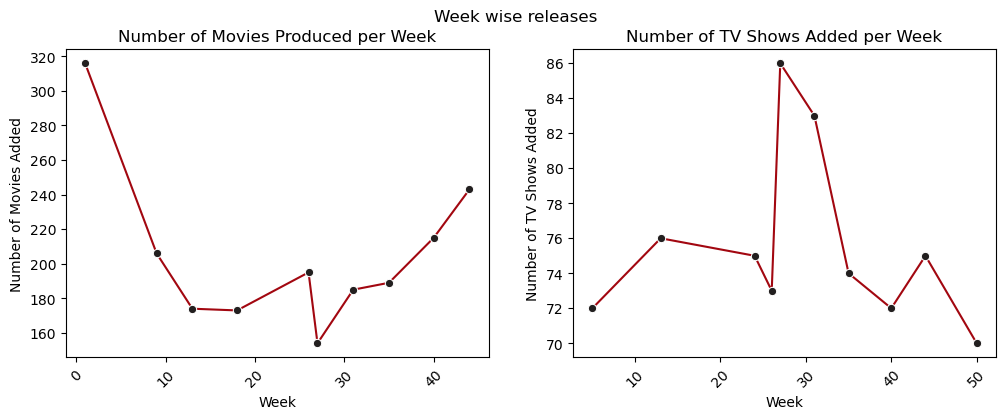

In [28]:

fig = plt.figure(figsize=(12, 4))
fig.suptitle('Week wise releases')


plt.subplot(1,2,1)
sns.lineplot(x = weeklymovies.week_added, y = weeklymovies.title, data = weeklymovies, marker = 'o', color = '#a20710', markerfacecolor='#221f1f')
plt.xlabel('Week')
plt.ylabel('Number of Movies Added')
plt.title('Number of Movies Produced per Week')
plt.xticks(rotation=45)  

plt.subplot(1,2,2)
sns.lineplot(x = weeklytvshows.week_added, y = weeklytvshows.title, data = weeklytvshows, marker = 'o', color = '#a20710', markerfacecolor='#221f1f')
plt.xlabel('Week')
plt.ylabel('Number of TV Shows Added')
plt.title('Number of TV Shows Added per Week')
plt.xticks(rotation=45)  
plt.show()

In [29]:
monthlymovies = small_df[small_df['type']=='Movie'].groupby('month_added')['title'].nunique().sort_values(ascending = False).reset_index().head(10)
monthlytvshows = small_df[small_df['type']=='TV Show'].groupby('month_added')['title'].nunique().sort_values(ascending = False).reset_index().head(10)
monthlymovies

,month_added,title
0,7,565
1,4,549
2,12,547
3,1,545
4,10,545
5,3,528
6,8,518
7,9,518
8,11,498
9,6,492


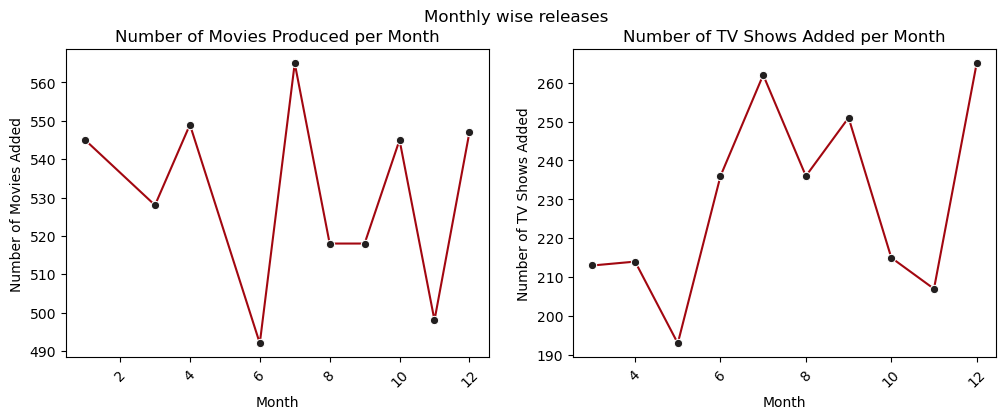

In [30]:

fig = plt.figure(figsize=(12, 4))
fig.suptitle('Monthly wise releases')


plt.subplot(1,2,1)
sns.lineplot(x = monthlymovies.month_added, y = monthlymovies.title, data = monthlymovies, marker = 'o', color = '#a20710', markerfacecolor='#221f1f')
plt.xlabel('Month')
plt.ylabel('Number of Movies Added')
plt.title('Number of Movies Produced per Month')
plt.xticks(rotation=45)  

plt.subplot(1,2,2)
sns.lineplot(x = monthlytvshows.month_added, y = monthlytvshows.title, data = monthlytvshows, marker = 'o', color = '#a20710', markerfacecolor='#221f1f')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows Added')
plt.title('Number of TV Shows Added per Month')
plt.xticks(rotation=45)  
plt.show()

In [31]:
toptendirectors = small_df.groupby('director')['title'].nunique().sort_values(ascending = False).reset_index().head(11)
toptendirectors = toptendirectors.drop(0)
toptenactors    = small_df.groupby('cast')['title'].nunique().sort_values(ascending = False).reset_index().head(11)
toptenactors    = toptenactors.drop(0)

In [32]:
toptenactors

,cast,title
1,Anupam Kher,39
2,Rupa Bhimani,31
3,Takahiro Sakurai,30
4,Julie Tejwani,28
5,Om Puri,27
6,Shah Rukh Khan,26
7,Rajesh Kava,26
8,Paresh Rawal,25
9,Boman Irani,25
10,Yuki Kaji,25


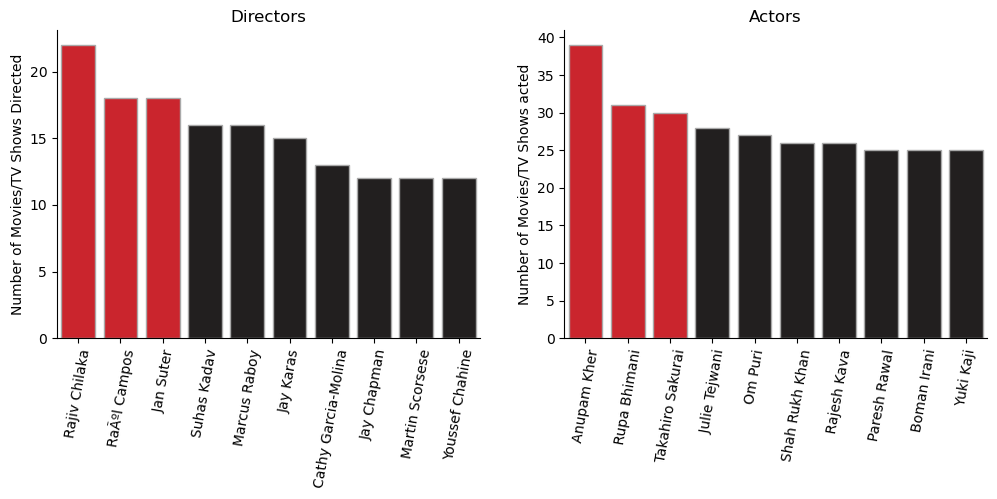

In [33]:
plt.figure(figsize=(12, 4))
fig.suptitle('Top 10 directors and actors')

color_map = ['#221f1f' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#e50914' # color highlight

plt.subplot(1,2,1)
ax = sns.barplot(x=toptendirectors.director, y=toptendirectors.title, data=toptendirectors, palette = color_map, edgecolor='darkgray')
plt.ylabel('Number of Movies/TV Shows Directed')
plt.xlabel('')
plt.title('Directors')
plt.xticks(rotation = 80)  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(1,2,2)
ax = sns.barplot(x=toptenactors.cast, y=toptenactors.title, data=toptenactors, palette = color_map,edgecolor='darkgray')
plt.ylabel('Number of Movies/TV Shows acted')
plt.xlabel('')
plt.title('Actors')
plt.xticks(rotation=80)  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()



In [34]:
!pip install wordcloud

In [35]:
small_df.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,week_added
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,38
1,1,s2,TV Show,Blood & Water,No Data,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,38
1,1,s2,TV Show,Blood & Water,No Data,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,38
1,1,s2,TV Show,Blood & Water,No Data,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,38
1,1,s2,TV Show,Blood & Water,No Data,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,38


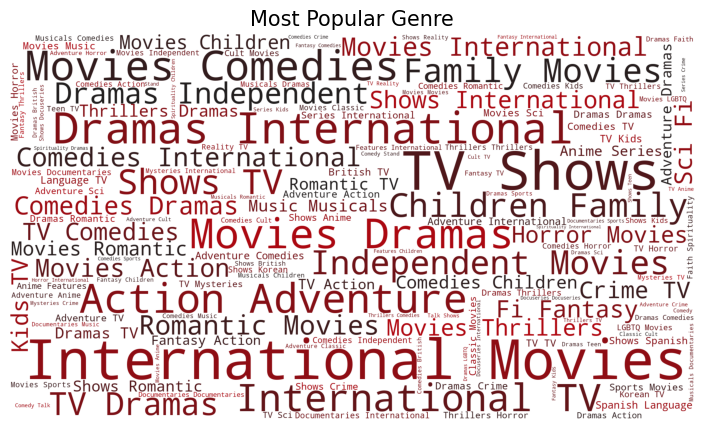

In [36]:
from wordcloud import WordCloud
import matplotlib

text = str(" ".join(str(i) for i in small_df.listed_in)).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
wordcloud = WordCloud(max_words=150, colormap= cmap, background_color = 'white', width=1920,height=1080).generate(text) 

plt.figure(figsize=(25, 5))
plt.imshow(wordcloud)
plt.title('Most Popular Genre', fontsize=15)
plt.axis("off")
plt.show()


In [37]:
small_df['year_added'] = pd.to_datetime(small_df['year_added'], format='%Y')

small_df['years_after'] = small_df['year_added'].dt.year - small_df['release_year']

small_df.groupby('country')['years_after'].value_counts()

country       years_after
              2              13
              1               9
              44              9
              7               8
              0               6
                             ..
Vietnam       1               6
              4               6
              3               4
West Germany  40              2
Zimbabwe      3              12
Name: years_after, Length: 1334, dtype: int64

In [38]:

small_df['year_added'] = pd.to_datetime(small_df['year_added'], format='%Y')
small_df['release_year'] = pd.to_datetime(small_df['release_year'], format='%Y')


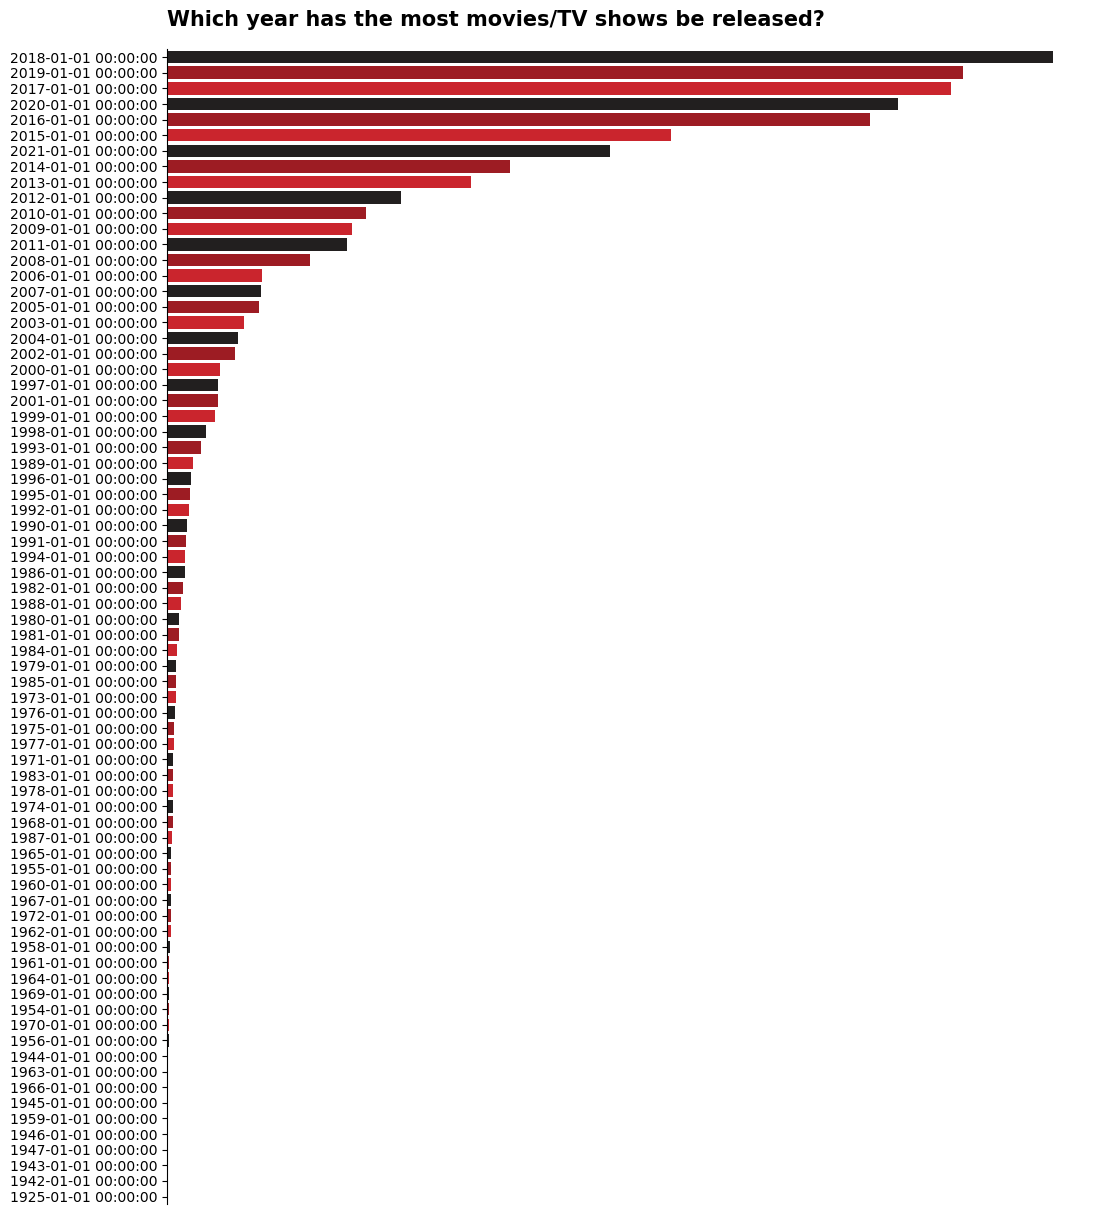

In [39]:
plt.figure(figsize=(12,15))
sns.countplot(y="release_year", data=small_df, palette=['#221f1f', '#b20710', '#e50914'], order=small_df['release_year'].value_counts().index)
plt.text(-2,-2,"Which year has the most movies/TV shows be released?", family='sans-serif', fontsize=15, weight='bold')
sns.despine(bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.show()

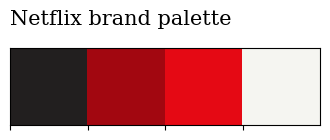

In [41]:
# Palette
sns.palplot(['#221f1f', '#a20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

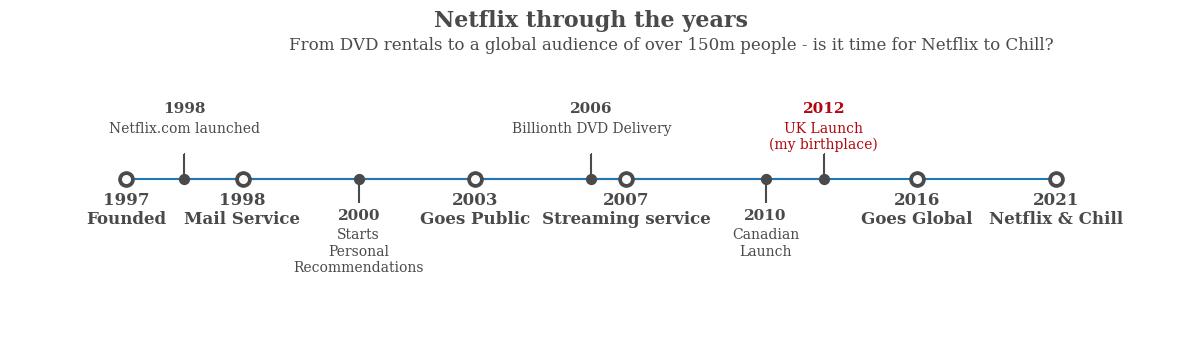

In [42]:

from datetime import datetime

## these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3 , 7.8, 9 ]

tl_sub_x = [1.5, 3, 5, 6.5, 7]


tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch\n(my birthplace)"]
fig, ax = plt.subplots(figsize=[15,4])
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)
ax.axhline(0, xmin=0.1, xmax= 0.9)

ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
    
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6
            , txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')

for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title

# Title
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()


In [43]:
# For viz: Ratio of Movies & TV shows

x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

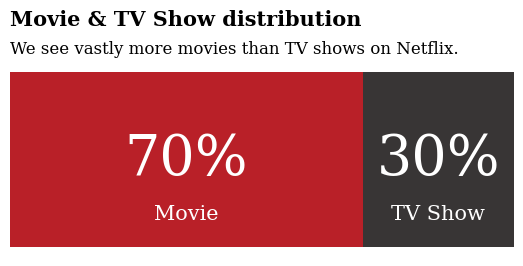

In [44]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Movie", 
                xy=(mf_ratio['Movie'][i]/2, -0.25),
                va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                color='white')
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    


#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

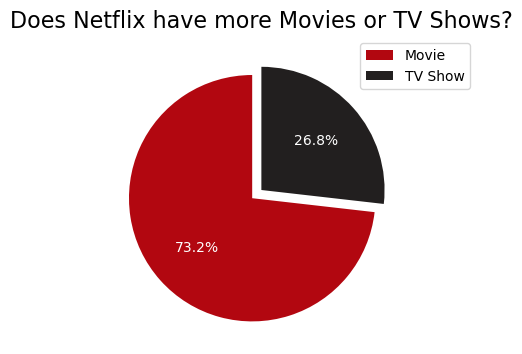

In [45]:

percent = small_df['type'].value_counts()

plt.figure(figsize=(8,4))
plt.pie(percent.values, labels=percent.index, autopct='%.1f%%', startangle=90, explode=[0.1, 0], colors=['#b20710', '#221f1f'], textprops={'color': 'white'})  # Set autopct text color to white
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,1))
plt.title('Does Netflix have more Movies or TV Shows?', fontsize=16)
plt.show()


In [46]:
oldest = small_df.sort_values('release_year', ascending=True)[['title', 'date_added', 'release_year']].head()
oldest =oldest.set_index('release_year')
oldest

,title,date_added
release_year,,
1925-01-01,Pioneers: First Women Filmmakers*,2018-12-30
1942-01-01,The Battle of Midway,2017-03-31
1942-01-01,The Battle of Midway,2017-03-31
1942-01-01,Prelude to War,2017-03-31
1943-01-01,Undercover: How to Operate Behind Enemy Lines,2017-03-31


Credits : Some of the visuals, I learnt from https://www.kaggle.com/code/joshuaswords/netflix-data-visualization

Recommendations:


